###POSTTEST KB 7
### NAMA : Muhammad Arif Rachman
### Kelas: A1 22
### NIM  : 2209106009

### LINK DATASET : https://www.kaggle.com/datasets/asdasdasasdas/garbage-classification

In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras import Input, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
import os
import pathlib
import matplotlib.pyplot as plt

 ### mengekstrak isi dari sebuah file ke dalam direktori

In [34]:
!unzip '/content/sample_data/archive.zip'

Output streaming akan dipotong hingga 5000 baris terakhir.
  inflating: Garbage classification/Garbage classification/cardboard/cardboard152.jpg  
  inflating: Garbage classification/Garbage classification/cardboard/cardboard153.jpg  
  inflating: Garbage classification/Garbage classification/cardboard/cardboard154.jpg  
  inflating: Garbage classification/Garbage classification/cardboard/cardboard155.jpg  
  inflating: Garbage classification/Garbage classification/cardboard/cardboard156.jpg  
  inflating: Garbage classification/Garbage classification/cardboard/cardboard157.jpg  
  inflating: Garbage classification/Garbage classification/cardboard/cardboard158.jpg  
  inflating: Garbage classification/Garbage classification/cardboard/cardboard159.jpg  
  inflating: Garbage classification/Garbage classification/cardboard/cardboard16.jpg  
  inflating: Garbage classification/Garbage classification/cardboard/cardboard160.jpg  
  inflating: Garbage classification/Garbage classification/car

In [35]:
!pip install split-folders

In [49]:
import splitfolders

### membagi dataset gambar yang berada dalam direktori sumber menjadi tiga bagian: pelatihan, validasi, dan pengujian

In [54]:
source_dir = "garbage classification/Garbage classification"
print("List of files and subdirectories in the source directory:")
print(os.listdir(source_dir))

output_dir = "dataset_final"
seed = 1337
ratios = (0.8, 0.1, 0.1)

splitfolders.ratio(source_dir, output=output_dir, seed=seed, ratio=ratios)


List of files and subdirectories in the source directory:
['paper', 'glass', 'plastic', 'metal', 'cardboard', 'trash']


Copying files: 2527 files [00:00, 8225.68 files/s]


### memuat dan mengelola data gambar dalam proses pelatihan dan validasi model

In [55]:
data_gen = ImageDataGenerator(rescale = 1/255., validation_split = 0.2)

train_data = data_gen.flow_from_directory('/content/dataset_final/train',
                                          target_size = (224, 224),
                                          batch_size = 32,
                                          subset = 'training',
                                          class_mode = 'binary')
val_data = data_gen.flow_from_directory('/content/dataset_final/val',
                                        target_size = (224, 224),
                                        batch_size = 32,
                                        subset = 'validation',
                                        class_mode = 'binary')

Found 1617 images belonging to 7 classes.
Found 48 images belonging to 7 classes.


### mengkonfigurasi dua objek generator data yang akan digunakan dalam proses pelatihan dan validasi model

In [56]:

train_generator= train_datagen.flow_from_directory(
    '/content/dataset_final/train',
    target_size=(150,150),
    batch_size=128,
    class_mode='categorical'
)
val_generator= train_datagen.flow_from_directory(
    '/content/dataset_final/val',
    target_size=(150,150),
    batch_size=128,
    class_mode='categorical'
)

Found 2019 images belonging to 7 classes.
Found 251 images belonging to 7 classes.


In [57]:
images, labels = train_data.next()
len(images), len(labels), images[0].shape

(32, 32, (224, 224, 3))

### mendefinisikan, mengkompilasi, dan melatih model Convolutional Neural Network (CNN)

In [61]:
model = Sequential([
    # 1. feature extraction layer
    Conv2D(32,(3,3), activation = 'relu',padding='same', input_shape = (150,150,3)),
    MaxPool2D((2,2),strides=2,padding = 'same'),
    Conv2D(64,(3,3), activation = 'relu',padding='same'),
    MaxPool2D((2,2),strides=2,padding = 'same'),
    Conv2D(128,(3,3), activation = 'relu',padding='same'),
    # 2. fully connected layer
    Flatten(),
    Dense(128, activation = 'relu'),
    Dense(7, activation = 'softmax')
])

model.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

hist=model.fit(train_generator,epochs=20,
          validation_data =val_generator,
          verbose=1)

Epoch 1/20
16/16 [==============================] - 23s 1s/step - loss: 2.5991 - accuracy: 0.2268 - val_loss: 1.7474 - val_accuracy: 0.2510
Epoch 2/20
16/16 [==============================] - 15s 938ms/step - loss: 1.6282 - accuracy: 0.3046 - val_loss: 1.5108 - val_accuracy: 0.3785
Epoch 3/20
16/16 [==============================] - 16s 953ms/step - loss: 1.4391 - accuracy: 0.4061 - val_loss: 1.4380 - val_accuracy: 0.4502
Epoch 4/20
16/16 [==============================] - 15s 924ms/step - loss: 1.3666 - accuracy: 0.4364 - val_loss: 1.4660 - val_accuracy: 0.3745
Epoch 5/20
16/16 [==============================] - 15s 925ms/step - loss: 1.3588 - accuracy: 0.4255 - val_loss: 1.4061 - val_accuracy: 0.4343
Epoch 6/20
16/16 [==============================] - 16s 1s/step - loss: 1.2552 - accuracy: 0.4884 - val_loss: 1.3225 - val_accuracy: 0.4980
Epoch 7/20
16/16 [==============================] - 17s 1s/step - loss: 1.2288 - accuracy: 0.5176 - val_loss: 1.2318 - val_accuracy: 0.5339
Epoch 8/

### evaluasi model

In [62]:
model.evaluate(val_generator)

2/2 [==============================] - 2s 941ms/step - loss: 0.9952 - accuracy: 0.6693


[0.9951983690261841, 0.6693227291107178]

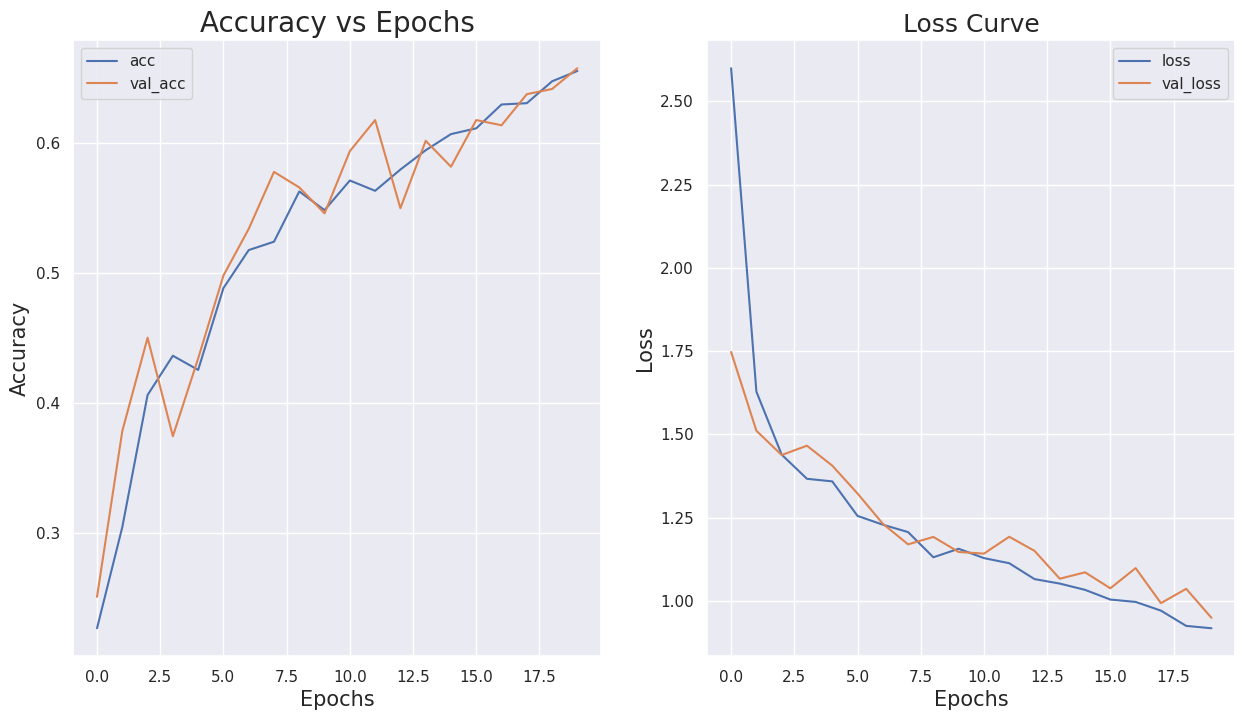

In [63]:
def model_performance_graphs():

    fig, axes = plt.subplots(1, 2, figsize = (15, 8))

    axes[0].plot(hist.epoch, hist.history['accuracy'], label = 'acc')
    axes[0].plot(hist.epoch, hist.history['val_accuracy'], label = 'val_acc')
    axes[0].set_title('Accuracy vs Epochs', fontsize = 20)
    axes[0].set_xlabel('Epochs', fontsize = 15)
    axes[0].set_ylabel('Accuracy', fontsize = 15)
    axes[0].legend()

    axes[1].plot(hist.epoch, hist.history['loss'], label = 'loss')
    axes[1].plot(hist.epoch, hist.history['val_loss'], label="val_loss")
    axes[1].set_title("Loss Curve",fontsize=18)
    axes[1].set_xlabel("Epochs",fontsize=15)
    axes[1].set_ylabel("Loss",fontsize=15)
    axes[1].legend()

    plt.show()

model_performance_graphs()